<a href="https://colab.research.google.com/github/Mtab-cyber/PCSE22-13/blob/Collab-Commit/PreProcessing_of_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
import string
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Copying the data into the dataframe

col_names = ["target", "ids", "date", "flag", "user", "text"]
df = pd.read_csv('/content/drive/MyDrive/training.1600000.processed.noemoticon.csv',encoding = "ISO-8859-1",names=col_names)

In [ ]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
#Droping The Coloumn

df = df.drop(['ids','date','flag','user'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [ ]:
df['target']=df['target'].replace(4,1)

In [ ]:
#StopWords Removal

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

#Removing the stopwords from text
def split_into_words(text):
    # split into words by white space
    words = text.split()
    return words

def to_lower_case(words):
    # convert to lower case
    words = [word.lower() for word in words]
    return words

def remove_punctuation(words):
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    stripped = [re_punc.sub('', w) for w in words]
    return stripped

def keep_alphabetic(words):
    # remove remaining tokens that are not alphabetic
    words = [word for word in words if word.isalpha()]
    return words

def remove_stopwords(words):
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

def to_sentence(words):
    # join words to a sentence
    return ' '.join(words)
def tweet(words):
    tweet_tokenizer = nltk.tokenize.TweetTokenizer(strip_handles=True,reduce_len=True)
    tweet = tweet_tokenizer.tokenize(words)
    return tweet
        

#Removing the noisy text
def denoise_text(text):
    words = split_into_words(text)
    words = to_lower_case(words)
    words = remove_punctuation(words)
    words = keep_alphabetic(words)
    words = remove_stopwords(words)
    return to_sentence(words)

In [ ]:
data = df['text']
labels = np.array(df['target'])

In [ ]:
data = data.apply(denoise_text)

In [ ]:
print(data)

0          switchfoot awww thats bummer shoulda got david...
1          upset cant update facebook texting might cry r...
2          kenichan dived many times ball managed save re...
3                           whole body feels itchy like fire
4                   nationwideclass behaving im mad cant see
                                 ...                        
1599995                        woke school best feeling ever
1599996              thewdbcom cool hear old walt interviews
1599997                      ready mojo makeover ask details
1599998      happy birthday boo alll time tupac amaru shakur
1599999          happy charitytuesday thenspcc sparkscharity
Name: text, Length: 1600000, dtype: object


In [ ]:
from textblob import TextBlob
print(type(data))

<class 'pandas.core.series.Series'>


In [ ]:
#Converting Series into new dataFrame for TextBlob

tweets = pd.DataFrame(data)
tweets = tweets.rename(columns={0:'Text'})

tweets.head()

,text
0,switchfoot awww thats bummer shoulda got david...
1,upset cant update facebook texting might cry r...
2,kenichan dived many times ball managed save re...
3,whole body feels itchy like fire
4,nationwideclass behaving im mad cant see


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

tweets['Subjectivity'] = df['text'].apply(getSubjectivity)
tweets['Polarity'] = df['text'].apply(getPolarity)

In [ ]:

count_p = 0
count_n = 0
count_neg = 0


In [ ]:
#Analysis

def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

tweets['Analysis'] = tweets['Polarity'].apply(getAnalysis)

tweets.head()


,text,Subjectivity,Polarity,Analysis
0,switchfoot awww thats bummer shoulda got david...,0.633333,0.216667,Positive
1,upset cant update facebook texting might cry r...,0.000000,0.000000,Neutral
2,kenichan dived many times ball managed save re...,0.500000,0.500000,Positive
3,whole body feels itchy like fire,0.400000,0.200000,Positive
4,nationwideclass behaving im mad cant see,1.000000,-0.625000,Negative


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1172675 to 1527005
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          20000 non-null  object 
 1   Subjectivity  20000 non-null  float64
 2   Polarity      20000 non-null  float64
 3   Analysis      20000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 781.2+ KB


In [ ]:
#Flag 1
tweets.to_csv(r'/content/drive/MyDrive/flag1.csv')

NameError: ignored

In [ ]:
tweets=pd.read_csv('/content/drive/MyDrive/flag1.csv')

In [ ]:
tweets['Analysis'].value_counts()

Positive    698007
Neutral     568723
Negative    333270
Name: Analysis, dtype: int64

In [ ]:
print("Before :")
df['target'].value_counts()

Before :


0    800000
1    800000
Name: target, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
tweets = tweets.reset_index(drop=True)

KeyboardInterrupt: ignored

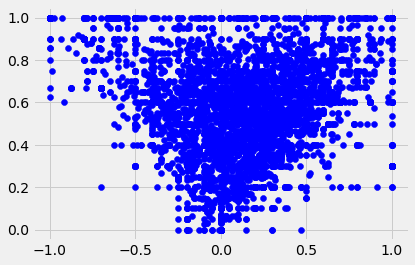

In [ ]:
for i in range(0,tweets.shape[0]):
  plt.scatter(tweets['Polarity'][i],tweets['Subjectivity'][i],color='Blue')

plt.title("Scatter Plot for Polariy and Subjectivity")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
tweets.plt.bar(x='',y='Polarity')

In [ ]:
tweets = tweets.drop(columns=tweets.columns[0],axis=1)
tweets.head()

,text,Subjectivity,Polarity,Analysis
0,switchfoot awww thats bummer shoulda got david...,0.633333,0.216667,Positive
1,upset cant update facebook texting might cry r...,0.000000,0.000000,Neutral
2,kenichan dived many times ball managed save re...,0.500000,0.500000,Positive
3,whole body feels itchy like fire,0.400000,0.200000,Positive
4,nationwideclass behaving im mad cant see,1.000000,-0.625000,Negative


In [ ]:
newdf = tweets
tweets = newdf.sample(n = 2000)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 692472 to 1048765
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          1998 non-null   object 
 1   Subjectivity  2000 non-null   float64
 2   Polarity      2000 non-null   float64
 3   Analysis      2000 non-null   object 
dtypes: float64(2), object(2)
memory usage: 78.1+ KB


In [ ]:
#Setting Up Training and Testing Sets by Choosing Random Sample From Classes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets['text'],tweets['Analysis'],test_size=0.30,random_state=0)

df_train = pd.DataFrame()
df_test = pd.DataFrame()

df_train['text'] = X_train
df_train['analysis'] = y_train
df_train = df_train.reset_index(drop=True)

df_test['text'] = X_test
df_test['analysis'] = y_test
df_test = df_test.reset_index(drop=True)



In [ ]:
print(X_train)
print(y_train)

1448371                                good morning everyone
965419     eat lunch im really hungry im sure im eating t...
722258                        im feeling weather found fever
1293775           finally finished stupid english assignment
1074985    couture sorry dont ass dimples slight back dim...
                                 ...                        
311415     listening ed schultz interview mich gov granho...
75556               austria loses denmark demoted iihfhockey
701781               got massive migraine muscles bones ache
949497     acryfromthesoul niiiiice missed time love meld...
1471652    therealnaziha back hahaha wasnt online past da...
Name: text, Length: 1400, dtype: object
1448371    Positive
965419     Positive
722258      Neutral
1293775    Negative
1074985    Negative
             ...   
311415      Neutral
75556      Negative
701781      Neutral
949497     Negative
1471652    Positive
Name: Analysis, Length: 1400, dtype: object


In [ ]:
#Naives Bayes

#from sklearn.model_selection import train_test_split
from __future__ import division
from collections import Counter

In [ ]:
#Naive Baise Classifier

class TweetNBClassifier(object):

  def __init__(self,df_train):
    self.df_train = df_train

    #Copying into different frames according to anaylsis
    self.df_pos = df_train.copy()[df_train.analysis == 'Positive']
    self.df_neg = df_train.copy()[df_train.analysis == 'Negative']
    self.df_neu = df_train.copy()[df_train.analysis == 'Neutral']

  def fit(self):
      #Probability of being positive, negative, neutral
      Pr_pos = self.df_pos.shape[0]/self.df_train.shape[0]
      Pr_neg = self.df_neg.shape[0]/self.df_train.shape[0]
      Pr_neu = self.df_neu.shape[0]/self.df_train.shape[0]

      self.Prior = (Pr_pos, Pr_neg, Pr_neu)

      #Creating Vocab of each sentiment
      self.pos_words = ' '.join(self.df_pos['text'].tolist()).split()
      self.neg_words = ' '.join(self.df_neg['text'].tolist()).split()
      self.neu_words = ' '.join(self.df_neu['text'].tolist()).split()

      all_words = ' '.join(self.df_train['text'].tolist()).split()

      self.vocab = len(Counter(all_words))

      wc_pos = len(' '.join(self.df_pos['text'].tolist()).split())
      wc_neg = len(' '.join(self.df_neg['text'].tolist()).split())
      wc_neu = len(' '.join(self.df_neu['text'].tolist()).split())

      self.word_count = (wc_pos, wc_neg, wc_neu)
      
  def predict(self, df_test):
        class_choice = ['positive', 'negative', 'neutral']

        classification = []
        for tweet in df_test['text']:
          text = tweet.split()

          val_pos = np.array([])
          val_neg = np.array([])
          val_neu = np.array([])
          for word in text:
            tmp_pos = np.log((self.pos_words.count(word)+1)/(self.word_count[0]+self.vocab))
            tmp_neg = np.log((self.neg_words.count(word)+1)/(self.word_count[0]+self.vocab))
            tmp_neu = np.log((self.neu_words.count(word)+1)/(self.word_count[0]+self.vocab))

            val_pos = np.append(val_pos, tmp_pos)
            val_neg = np.append(val_neg, tmp_neg)
            val_neu = np.append(val_neu, tmp_neu)

          val_pos = np.log(self.Prior[0]) + np.sum(val_pos)
          val_neg = np.log(self.Prior[1]) + np.sum(val_neg)
          val_neu = np.log(self.Prior[2]) + np.sum(val_neu)

          prob = (val_pos, val_neg, val_neu)
          classification.append(class_choice[np.argmax(prob)])

        return classification

  def score(self, feature, target):

          compare = []
          for i in range(0,len(feature)):
            if feature[i] == target[i]:
              tmp = 'correct'
              compare.append(tmp)
            else:
              tmp = 'incorrect'
              compare.append(tmp)
          r = Counter(compare)
          accuracy = r['correct']/len(feature)
          return accuracy

  def precision(self, feature, target, temp):

          true_pos = 0
          total_pos = 0
          for i in range(0,len(feature)):
            if feature[i] == target[i] and target[i] == temp:
              true_pos += 1
            if feature[i] == temp:
              total_pos += 1

          score = true_pos/total_pos
          return score


  def recall(self, feature, target, temp):

          true_pos = 0
          total = 0

          for i in range(0,len(feature)):
            if feature[i] == target[i] and target[i] == temp:
              true_pos += 1
            if target[i] == temp:
              total_pos += 1

          score = true_pos/total_pos
          return score

  def f1score(precision, recall):
          f1 = 2*((precision*recall)/(precision+recall))
          return f1

In [ ]:
tnb = TweetNBClassifier(df_train)
tnb = tnb.fit()
predict = tnb.predict(df_test)
score = tnb.score(predict,df_test.Analysis.tolist())
print(score)

AttributeError: ignored

In [ ]:
#Precision TruePositive/(TruePositive+FalsePositive)


In [ ]:
#improrts for all rest three
#from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
clean_train=[]
for tweet in df_train['text']:
  clean_train.append(tweet)
clean_test=[]
for tweet in df_test['text']:
  clean_test.append(tweet)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_f = v.fit_transform(df_train['text'].values.astype('U'))
#map(unicode,clean_test)
#train_s = v.fit_transform(df_train['analysis'].values.astype('U'))
test_f = v.fit_transform(df_test['text'].values.astype('U'))


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(df_train['analysis'])

In [ ]:
print(y)

[2 2 1 ... 1 0 2]


In [ ]:
Classifiers = [
    SVC(kernel='rbf', C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)
]

In [ ]:
dense_feature=train_f.toarray()
dense_test=test_f.toarray()
accuracy=[]
model=[]
print(len(dense_test))

600


In [ ]:

for classifier in Classifiers:
  try:
    fit=classifier.fit(train_f,df_train['analysis'])
    pred = fit.predict(test_f)
  except Exception:
    fit = classifier.fit(dense_feature,y)
    pred = fit.predict(dense_test)
  
  acc=accuracy_score(pred,df_test['analysis'])
  accuracy.append(acc)
  model.append(classifier.__class__.__name__)
  cm=confusion_matrix(pred,df_test['analysis'])
  plt.figure()
  plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
  plt.xticks(range(3), ['Negative', 'Neutral','Positive'], fontsize=16,color='blue')
  plt.yticks(range(3), ['Negative', 'Neutral','Positive'], fontsize=16,color='blue')
  plt.show()

  print('Accuracy of '+classifier.__class__.__name__+'is '+str(acc))
  print(classification_report(pred,df_test['analysis']))

ValueError: ignored